This is a Julian fork of the 12 steps to Navier-Stokes (Python) [https://github.com/barbagroup/CFDPython] by Lorena A. Barba, Gilbert F. Forsyth . All content of that work is under Creative Commons Attribution CC-BY 4.0, and all python code is under BSD-3 clause. This work also derives from similar forks by Cysor [https://github.com/Cysor/CFDJulia] and by Wallace-dyfq [https://github.com/Wallace-dyfq/CFD-Julia-12-steps--o-Navier-Stokes-Equations]

The final two steps in this interactive module teaching beginning CFD with Julia will both solve the Navier-Stokes equations in two dimensions, but with different boundary conditions.

The momentum equation in vector form for a velocity field $\vec{v}$ is:

$$\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\nabla)\vec{v}=-\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{v}$$

This represents three scalar equations, one for each velocity component $(u,v,w)$. But we will solve it in two dimensions, so there will be two scalar equations.

Remember the continuity equation? This is where the Poisson equation for pressure comes in!

Step 11: Cavity Flow with Navier-Stokes
----
***

Here is the system of differential equations: two equations for the velocity components $u,v$ and one equation for pressure:

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) $$


$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right) $$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = \rho\left(\frac{\partial }{\partial t}\left(\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}\right) - \frac{\partial u}{\partial x}\frac{\partial u}{\partial x} - 2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x} - \frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$

From the previous steps, we already know how to discretize all these terms. Only the last equation is a little unfamiliar. But with a little patience, it will not be hard!

### Discretized equations

First, let's discretize the $u$-momentum equation, as follows:

\begin{eqnarray}
&&\frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y}\\\ 
&&=-\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x}+\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)\end{eqnarray}

Similarly for the $v$-momentum equation:

\begin{eqnarray}
&&\frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y}\\\
&&=-\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y}
+\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)\end{eqnarray}

Finally, the discretized pressure-Poisson equation can be written thus:

$$ \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2*p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} 
=\rho\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)\right.$$

$$-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}
- \ 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}
-\left.\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
$$

You should write these equations down on your own notes, by hand, following each term mentally as you write it.

As before, let's rearrange the equations in the way that the iterations need to proceed in the code. First, the momentum equations for the velocity at the next time step.


The momentum equation in the $u$ direction:

$$
u_{i,j}^{n+1} = u_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta t}{\Delta x}(u_{i,j}^{n}-u_{i-1,j}^{n})
- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(u_{i,j}^{n}-u_{i,j-1}^{n})$$
$$-\frac{\Delta t}{\rho 2\Delta x}(p_{i+1,j}^{n}-p_{i-1,j}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n})\right)
$$

The momentum equation in the $v$ direction:

$$v_{i,j}^{n+1} = v_{i,j}^{n}-u_{i,j}^{n}\frac{\Delta t}{\Delta x}(v_{i,j}^{n}-v_{i-1,j}^{n})
- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(v_{i,j}^{n}-v_{i,j-1}^{n})$$
$$
-\frac{\Delta t}{\rho 2\Delta y}(p_{i,j+1}^{n}-p_{i,j-1}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n})\right)$$

Almost there! Now, we rearrange the pressure-Poisson equation:

$$
p_{i,j}^{n}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2}{2(\Delta x^2+\Delta y^2)}-\frac{\rho\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)} \times$$

$$\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\right. $$

$$ -2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}-\left.\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]$$

The initial condition is $u, v, p = 0$ everywhere, and the boundary conditions are:

$u=1$ at $y=2$ (the "lid");

$u, v=0$ on the other boundaries;

$\frac{\partial p}{\partial y}=0$ at $y=0$;

$p=0$ at $y=2$

$\frac{\partial p}{\partial x}=0$ at $x=0,2$


Implementing Cavity Flow
----


In [1]:
nx = 41
ny = 41

xmin = 0.0
xmax = 2.0

ymin = 0.0
ymax = 2.0

    
Δx = (xmax - xmin) / (nx - 1)
Δy = (ymax - ymin) / (ny - 1)

ρ = 1.0;
ν = 0.1;
Δt = .001;


x = range(xmin, stop=xmax, length=nx)
y = range(ymin, stop=ymax, length=ny)

p₀ = zeros(ny, nx)
u₀ = zeros(ny, nx)
v₀ = zeros(ny, nx)


        
u₀[end, :] .= 1.0;    #set velocity on cavity lid equal to 1


$$
p_{i,j}^{n}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2}{2(\Delta x^2+\Delta y^2)}-\frac{\rho\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)} \times$$

$$\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\right. $$

$$ -2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}-\left.\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]$$

In [2]:
using LinearAlgebra

function pressurePoisson!(p, x, y, Δx, Δy, u, v; nt = 5000, l1norm_target = 0.001)

    pn = similar(p) ; 
    
    row = size(y,1);    
    col = size(x,1);    
    
    l1norm = 1;    
    it = 1;
    
    while (l1norm > l1norm_target && it < nt)
        
        pn .= p;
                
        for j in 1:row
            for i in 1:col
                if j == 1
                    p[j,i] = p[2,i]    #dp/dy = 0 at y = 0
                elseif j == row
                    p[j,i] = 0.0    #p = 0 at y = 2
                elseif i == col
                    p[j,i] = p[j,col-1]    #dp/dy = 0 at x = 2
                elseif i == 1
                    p[j,i] = p[j,2]    #dp/dx = 0 at x = 0
                else
                    p[j,i] = ( Δy^2*(pn[j, i+1]+pn[j, i-1]) + Δx^2*(pn[j+1, i]+pn[j-1, i]) )/2.0/(Δx^2 + Δy^2) -
                    
                        ρ*Δx^2*Δy^2/2.0/(Δx^2+Δy^2)*( 1.0/Δt*( (u[j,i+1]-u[j,i-1])/2.0/Δx + (v[j+1,i]-v[j-1,i])/2.0/Δy )
                                -( (u[j,i+1]-u[j,i-1])/2.0/Δx )^2 - 
                                2.0*( (u[j+1,i]-u[j-1,i])/2.0/Δy*(v[j,i+1]-v[j,i-1])/2.0/Δx ) -
                                ( (v[j+1,i]-v[j-1,i])/2.0/Δy )^2 )
                end
            end
        end
       
            
        l1norm = norm((p-pn)./(pn.+1.0e-30),1)
        
        it +=1;
        
    end
    
    #@show it, l1norm
    
    return p

end

pressurePoisson! (generic function with 1 method)

Finally, the rest of the cavity flow equations are wrapped inside the function `cavityFlow`, allowing us to easily plot the results of the cavity flow solver for different lengths of time.  

The momentum equation in the $u$ direction:

$$
u_{i,j}^{n+1} = u_{i,j}^{n} - u_{i,j}^{n}\frac{\Delta t}{\Delta x}(u_{i,j}^{n}-u_{i-1,j}^{n})
- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(u_{i,j}^{n}-u_{i,j-1}^{n})$$
$$-\frac{\Delta t}{\rho 2\Delta x}(p_{i+1,j}^{n}-p_{i-1,j}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n})\right)
$$

The momentum equation in the $v$ direction:

$$v_{i,j}^{n+1} = v_{i,j}^{n}-u_{i,j}^{n}\frac{\Delta t}{\Delta x}(v_{i,j}^{n}-v_{i-1,j}^{n})
- v_{i,j}^{n}\frac{\Delta t}{\Delta y}(v_{i,j}^{n}-v_{i,j-1}^{n})$$
$$
-\frac{\Delta t}{\rho 2\Delta y}(p_{i,j+1}^{n}-p_{i,j-1}^{n})
+\nu\left(\frac{\Delta t}{\Delta x^2}(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n})\right.
+\left.\frac{\Delta t}{\Delta y^2}(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n})\right)$$

In [3]:
function cavityFlow(nt, u₀, v₀, p₀, Δt, Δx, Δy, ρ, ν)
    
    uⁿ⁺¹ = zeros(size(u₀));
    uⁿ = similar(uⁿ⁺¹);
    uⁿ⁺¹ .= u₀;
    
    vⁿ⁺¹ = zeros(size(v₀));
    vⁿ = similar(vⁿ⁺¹);
    vⁿ⁺¹ .= v₀;
    
    p = zeros(size(p₀));
    p .= p₀;
    
    row = size(y,1);    
    col = size(x,1);    
    
    for n in 1:nt
    
        uⁿ .= uⁿ⁺¹
        vⁿ .= vⁿ⁺¹
    
        pressurePoisson!(p, x, y, Δx, Δy, uⁿ, vⁿ; nt = 5000, l1norm_target = 0.01)  # this function directly updates p
        
        for j in 1:row
            for i in 1:col
                if j == 1
                    uⁿ⁺¹[j, i] = 0.0
                    vⁿ⁺¹[j, i] = 0.0
                elseif j == row
                    uⁿ⁺¹[j, i] = 1.0    #set velocity on cavity lid equal to 1
                    vⁿ⁺¹[j, i] = 0.0
                elseif i == col
                    uⁿ⁺¹[j, i] = 0.0
                    vⁿ⁺¹[j, i] = 0.0
                elseif i == 1
                    uⁿ⁺¹[j, i] = 0.0
                    vⁿ⁺¹[j, i] = 0.0                    
                else
                    uⁿ⁺¹[j, i] = ( uⁿ[j, i] - 
                            (uⁿ[j, i]*Δt/Δx * (uⁿ[j, i] - uⁿ[j, i-1])) - 
                            (vⁿ[j, i]*Δt/Δy * (uⁿ[j, i] - uⁿ[j-1, i])) -
                            Δt/ρ/2.0/Δx*(p[j,i+1]-p[j,i-1]) +
                            (ν*Δt/Δx^2*(uⁿ[j, i+1] - 2.0*uⁿ[j, i] + uⁿ[j, i-1])) + 
                            (ν*Δt/Δy^2*(uⁿ[j+1, i] - 2.0*uⁿ[j, i] + uⁿ[j-1, i])) )
                
                    vⁿ⁺¹[j, i] = ( vⁿ[j, i] - 
                            (uⁿ[j, i]*Δt/Δx * (vⁿ[j, i] - vⁿ[j, i-1])) - 
                            (vⁿ[j, i]*Δt/Δy * (vⁿ[j, i] - vⁿ[j-1, i])) -
                            Δt/ρ/2.0/Δy*(p[j+1,i]-p[j-1,i]) +
                            (ν*Δt/Δx^2*(vⁿ[j, i+1] - 2.0*vⁿ[j, i] + vⁿ[j, i-1])) + 
                            (ν*Δt/Δy^2*(vⁿ[j+1, i] - 2.0*vⁿ[j, i] + vⁿ[j-1, i])) )            
                end
            end
        end

        if n%25 == 0
            @show n
        end
        
    end

    return uⁿ⁺¹, vⁿ⁺¹, p
    
end

cavityFlow (generic function with 1 method)

Let's start with `nt = 100` and see what the solver gives us:

In [4]:
u = zeros((ny, nx));
v = zeros((ny, nx));
p = zeros((ny, nx));


nt = 100;
u, v, p = cavityFlow(nt, u₀, v₀, p₀, Δt, Δx, Δy, ρ, ν);

n = 25
n = 50
n = 75
n = 100


In [5]:
using PyPlot

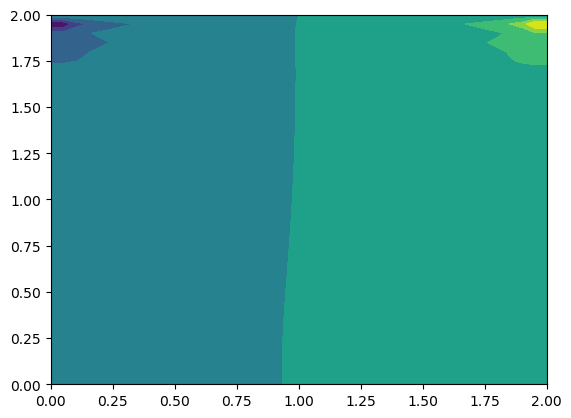

PyObject <matplotlib.contour.QuadContourSet object at 0x000000003A6A7F48>

In [6]:
contourf(x,y,p)

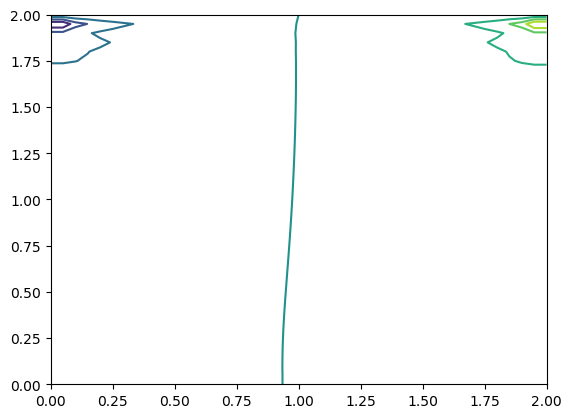

PyObject <matplotlib.contour.QuadContourSet object at 0x000000003A8CE148>

In [7]:
contour(x,y,p)

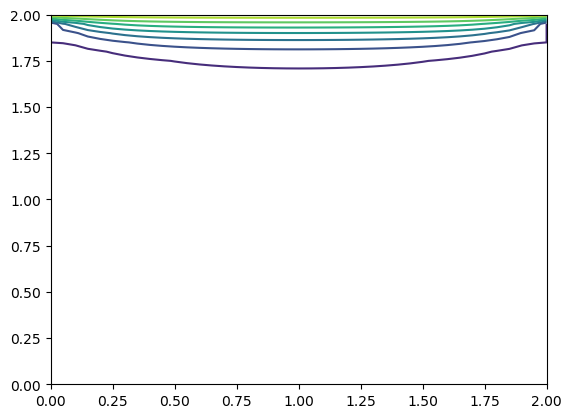

PyObject <matplotlib.contour.QuadContourSet object at 0x000000003A79D548>

In [8]:
contour(x,y,u)

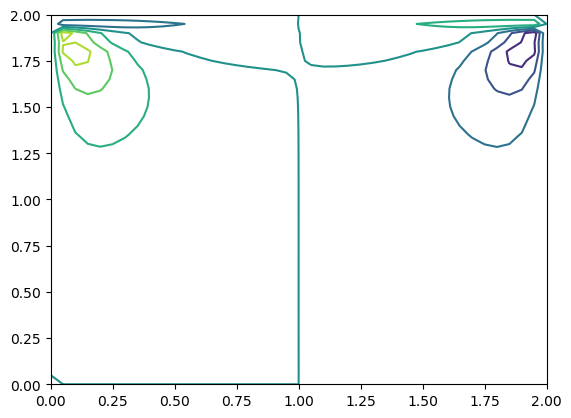

PyObject <matplotlib.contour.QuadContourSet object at 0x000000003A821E88>

In [9]:
contour(x,y,v)

In [10]:
xgrid = repeat(x', nx, 1);
ygrid = repeat(y, 1, ny);

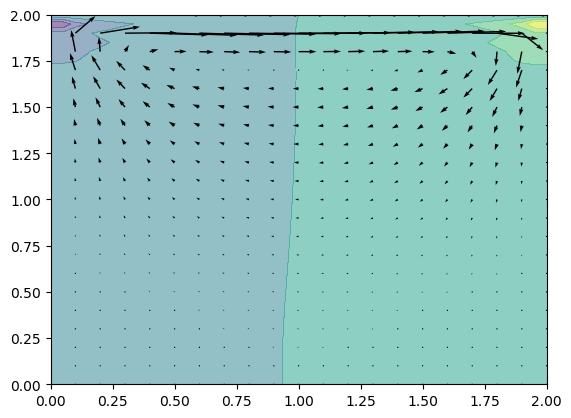

PyObject <matplotlib.quiver.Quiver object at 0x000000003AA5FA08>

In [11]:
contourf(x,y,p,alpha=0.5)
quiver(xgrid[1:2:end,1:2:end],ygrid[1:2:end,1:2:end],u[1:2:end,1:2:end],v[1:2:end,1:2:end]) ##plotting velocity vector

You can see that two distinct pressure zones are forming and that the spiral pattern expected from lid-driven cavity flow is beginning to form.  Later, we will experiment with different values of `nt` to see how long the system takes to stabilize.  

In [12]:
u2 = zeros((ny, nx));
v2 = zeros((ny, nx));
p2 = zeros((ny, nx));

nt = 700;
u2, v2, p2 = cavityFlow(nt, u₀, v₀, p₀, Δt, Δx, Δy, ρ, ν);

n = 25
n = 50
n = 75
n = 100
n = 125
n = 150
n = 175
n = 200
n = 225
n = 250
n = 275
n = 300
n = 325
n = 350
n = 375
n = 400
n = 425
n = 450
n = 475
n = 500
n = 525
n = 550
n = 575
n = 600
n = 625
n = 650
n = 675
n = 700


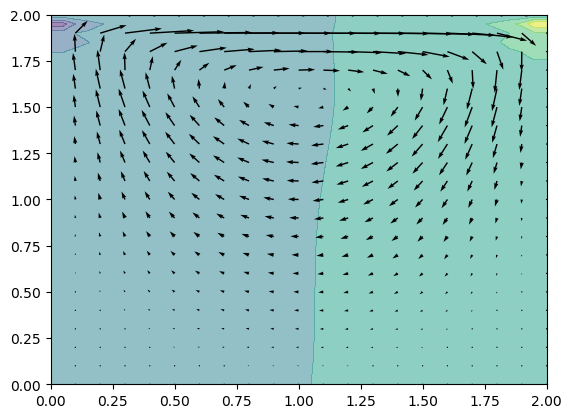

PyObject <matplotlib.quiver.Quiver object at 0x000000003A9BF988>

In [13]:
contourf(x,y,p2,alpha=0.5)
quiver(xgrid[1:2:end,1:2:end],ygrid[1:2:end,1:2:end],u2[1:2:end,1:2:end],v2[1:2:end,1:2:end]) ##plotting velocity